In [16]:
%matplotlib inline

import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot  as plt
from scipy import stats

pd.set_option('display.float_format', '{:.2f}'.format)

In [17]:
df = pd.read_csv('train_transformed.csv', index_col='id')
df = df.filter(['habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales'])

In [9]:
def get_column(A, j): 
    return A.iloc[:,j]

def boxplot_list(df):
    
    df = df.copy().dropna()

    _, num_columns = df.shape
    fig, ax = plt.subplots(1, num_columns, figsize = (4 * num_columns, 4)) 
    red_square = dict(markerfacecolor='r', marker='s')
    columns = df.columns.values
    
    for i in range(num_columns):        
        i_column = get_column(df, i)
        i_column = i_column.sample(1000, random_state=1)

        ax[i].boxplot(x=i_column, vert=False, flierprops=red_square)
        ax[i].xaxis.set_visible(True) 
        ax[i].yaxis.set_visible(True)
        ax[i].set_xlabel(columns[i], fontsize=14)
        
    plt.show()

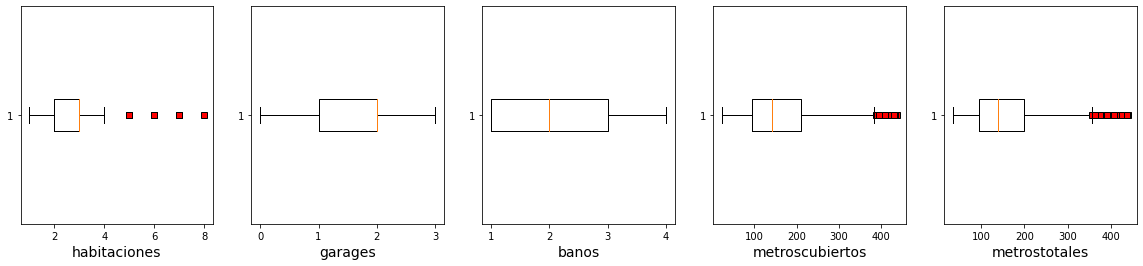

In [10]:
# BOXPLOTS

# hago graficos boxplot de con el objetivo de ver outliers y entender un poco mejor
# la distribucion de las features numericas: 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales'.
boxplot_list(df)

In [11]:
# habitaciones
# el 50% de las publicaciones tienen habitaciones de 2 y 3
# la mayoria de las publicaciones tienen habitaciones de 1 a 4
# presenta outliers. Son valores validos, son pocas las publicaciones con habitaciones > 4

# garages
# el 50% de las publicaciones tienen garages de 1 y 2
# la mayoria de las publicaciones tienen garages de 0 a 3
# no presenta outliers

# banos
# el 50% de las publicaciones tienen banos de 1 y 3
# la mayoria de las publicaciones tienen banos de 1 a 4
# no presenta outliers.

# metroscubiertos
# el 50% de las publicaciones tienen metroscubiertos entre 100 y 200 aproximadamente
# la mayoria de las publicaciones tienen metroscubiertos mayor a 0 aproximadamente y menor a 400
# presenta outliers. Son valores validos, son pocas las publicaciones con metroscubiertos > 400 aprox

# metrostotales
# el 50% de las publicaciones tienen metrostotales entre 100 y 200 aproximadamente
# la mayoria de las publicaciones tienen metrostotales mayor a 0 aproximadamente y menor a 350
# presenta outliers. Son valores validos, son pocas las publicaciones con metrostotales > 350 aprox

In [12]:
# COMENTARIOS GENERALES SOBRE ANALISIS DE BOXPLOTS

# Cuando la variable en analisis tiene pocos valores para tomar, se puede dar que el percentil 1 solo tenga 1 valor
# entonces no se podra ver el bigote que indica cuantos valores abarca este percentil,
# como por ejemplo, se puede observar en 'baños'.

# Tambien puede suceder que la mediana (percentil 2) este en el mismo valor que el percentil 1 o 3, como se puede
# observar en 'garages'.

# IQR = Q3 - Q1
# comienzo del bigote: Q1 - 1.5*IQR
# final del bigote: Q3 + 1.5*IQR

# https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [15]:
# encuentro outliers con una desviacion estandar normal > 3
threshold = 3
z = np.abs(stats.zscore(df.dropna()))
outliers = np.where(z > threshold)
#outliers[0] corresponde al nro de row
#outliers[1] corresponde al nro de col
outliers

(array([    56,    146,    154, ..., 139182, 139329, 139365]),
 array([4, 4, 4, ..., 4, 3, 0]))

In [40]:
#saving dataframe
df = df.drop(outliers[0])
df.to_csv('data_with_no_outliers.csv')

(240000, 5)

In [ ]:
# con respecto a los outliers en la feature de precios, estos no son mas que casas sobrevaluadas,
# por ahi se trata de mansiones y casas de ese tipo, se puede considerar separar este tipo de casas y hacer
# un analisis aparte ya que los precios probablemente esten mucho mas dispersos y presenten features muy 
# distintas a la mayoria de las publicaciones.